**link colab : https://colab.research.google.com/drive/1Wb1ndXrxy03KEod_OxG5XMAttx4H4vcm?usp=sharing**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##read data

In [5]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##pre-processing

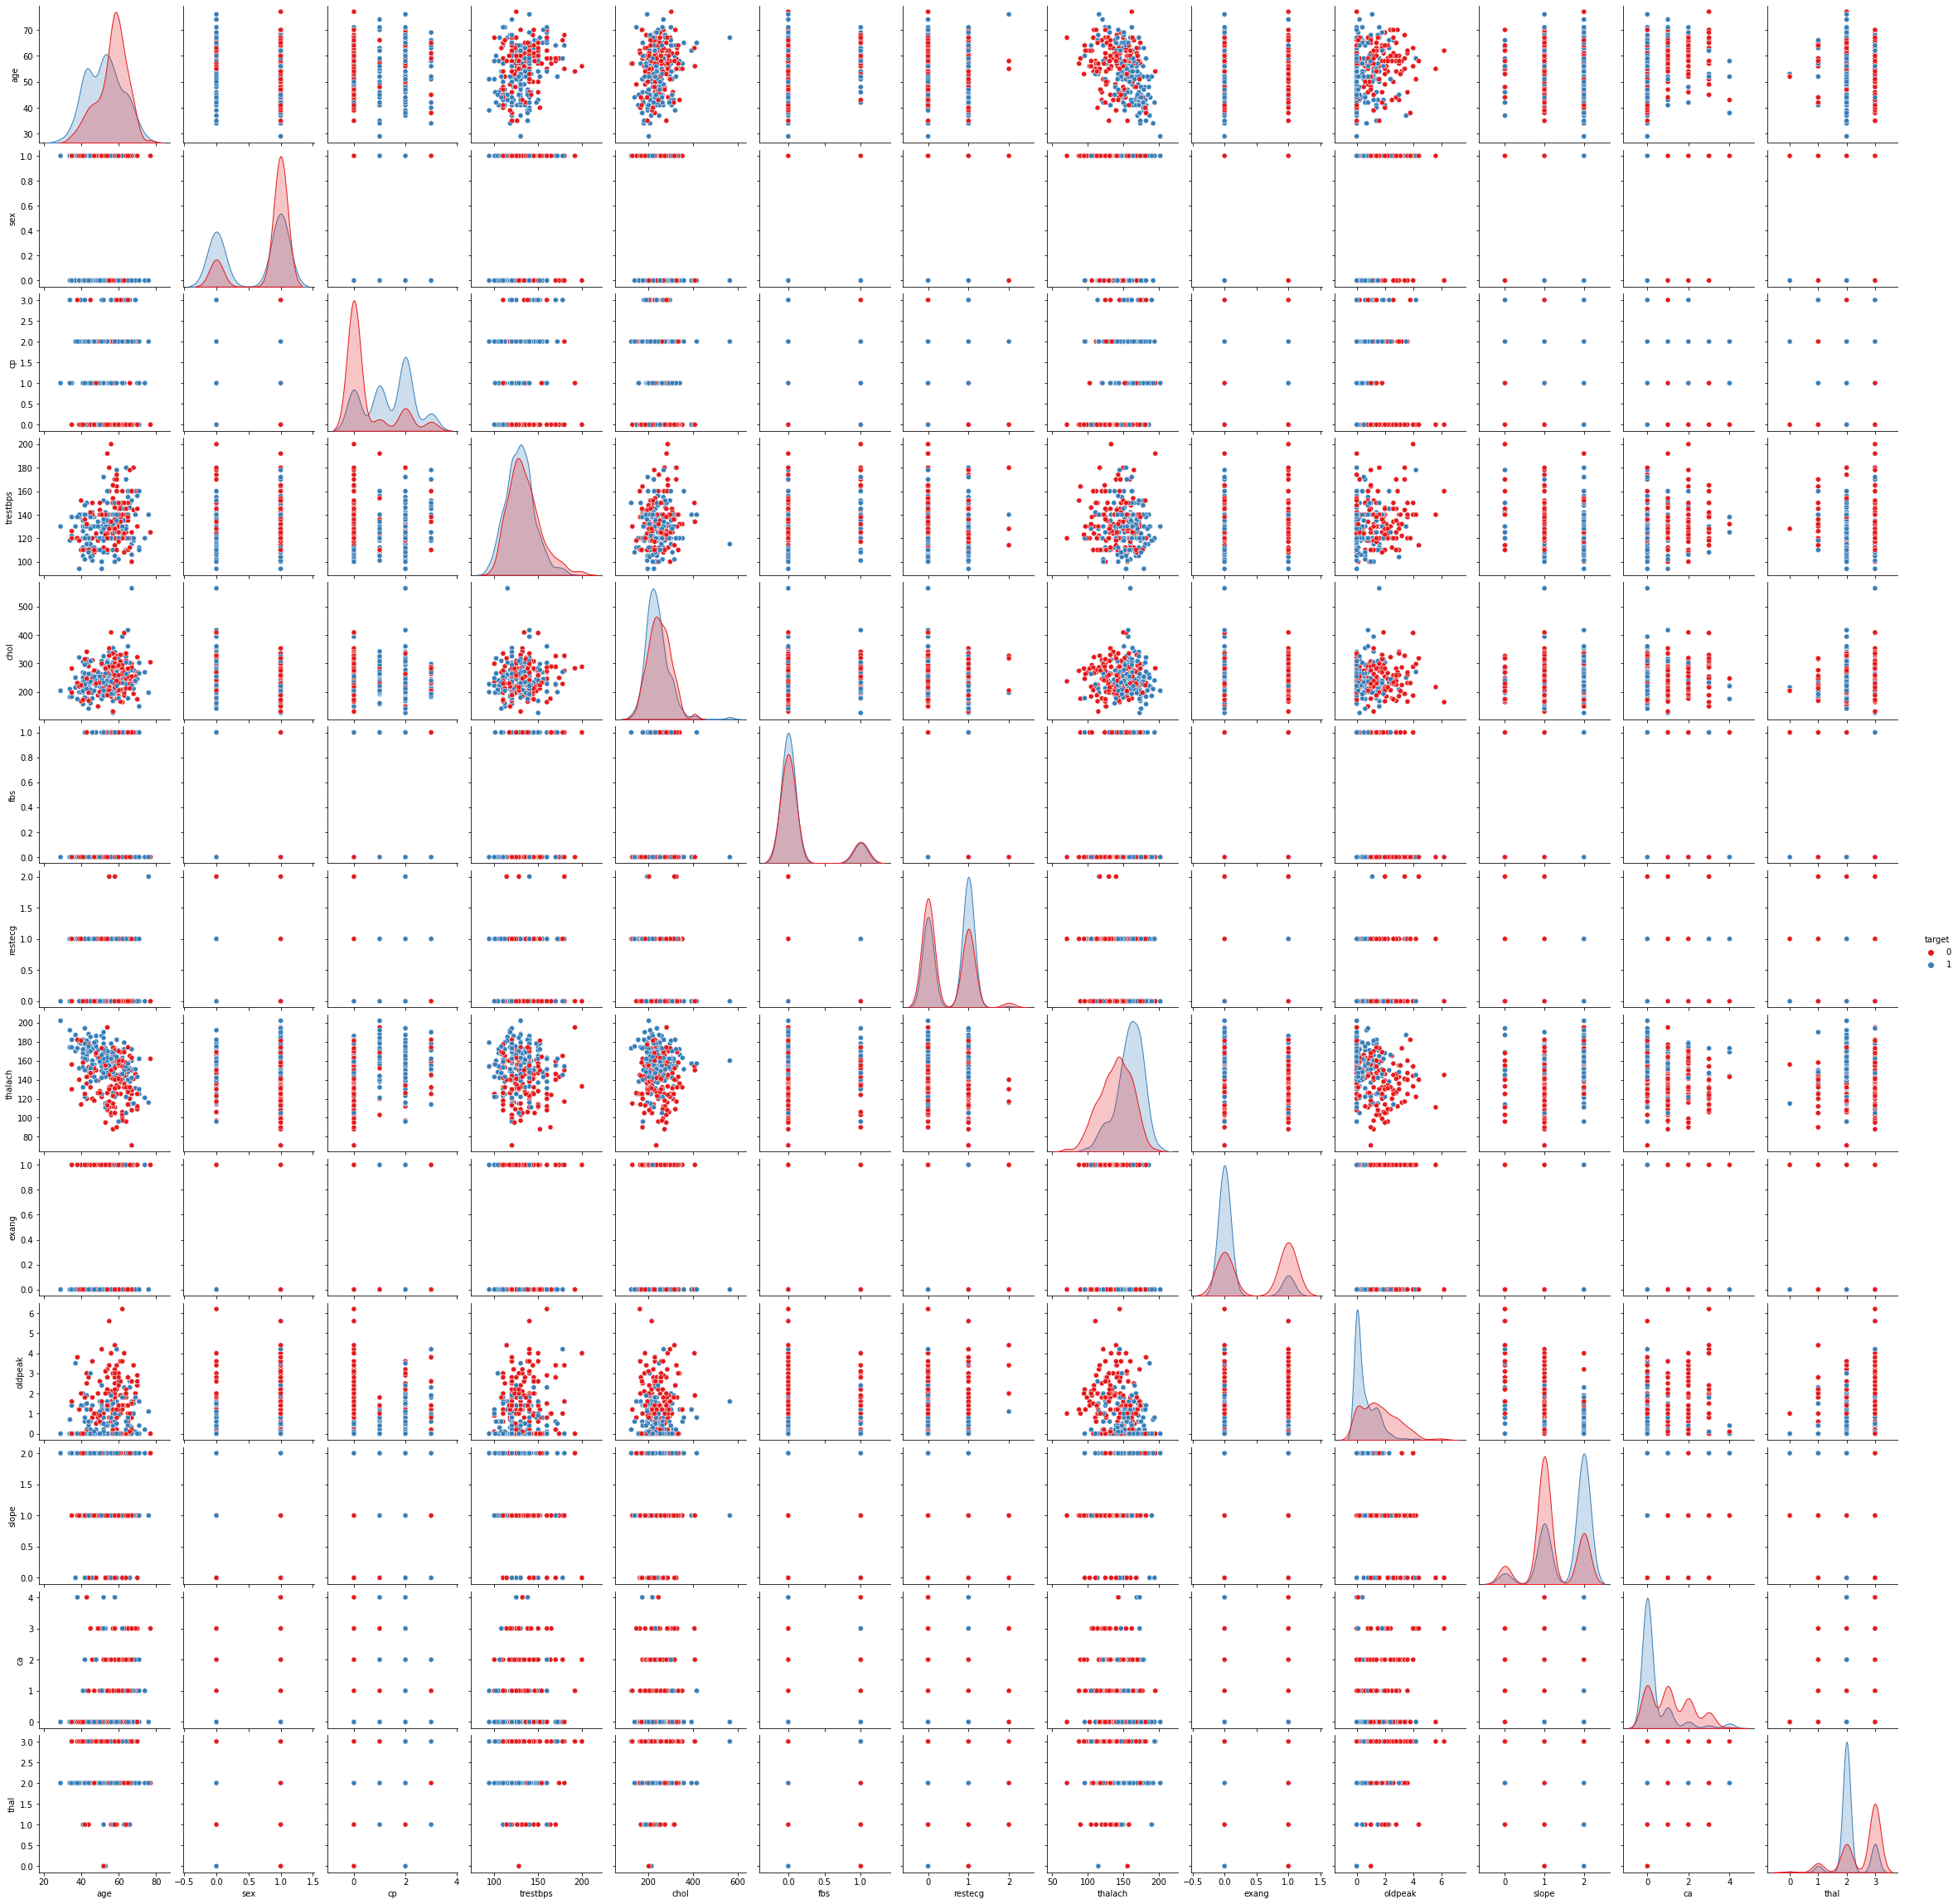

In [9]:
sns.pairplot(df,hue='target',palette='Set1')

##train test split

In [10]:
y = df.target.values
x = df.drop(['target'], axis = 1).values
x[0:5]

array([[ 52. ,   1. ,   0. , 125. , 212. ,   0. ,   1. , 168. ,   0. ,
          1. ,   2. ,   2. ,   3. ],
       [ 53. ,   1. ,   0. , 140. , 203. ,   1. ,   0. , 155. ,   1. ,
          3.1,   0. ,   0. ,   3. ],
       [ 70. ,   1. ,   0. , 145. , 174. ,   0. ,   1. , 125. ,   1. ,
          2.6,   0. ,   0. ,   3. ],
       [ 61. ,   1. ,   0. , 148. , 203. ,   0. ,   1. , 161. ,   0. ,
          0. ,   2. ,   1. ,   3. ],
       [ 62. ,   0. ,   0. , 138. , 294. ,   1. ,   1. , 106. ,   0. ,
          1.9,   1. ,   3. ,   2. ]])

In [11]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

##DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier
heartTree = DecisionTreeClassifier()
heartTree

DecisionTreeClassifier()

In [13]:
heartTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier()

In [14]:
predTree = heartTree.predict(X_testset)

In [15]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9902597402597403


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.98      1.00      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [17]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO

from sklearn.tree import export_graphviz
import pydot 
features = list(df.columns[:-1])
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

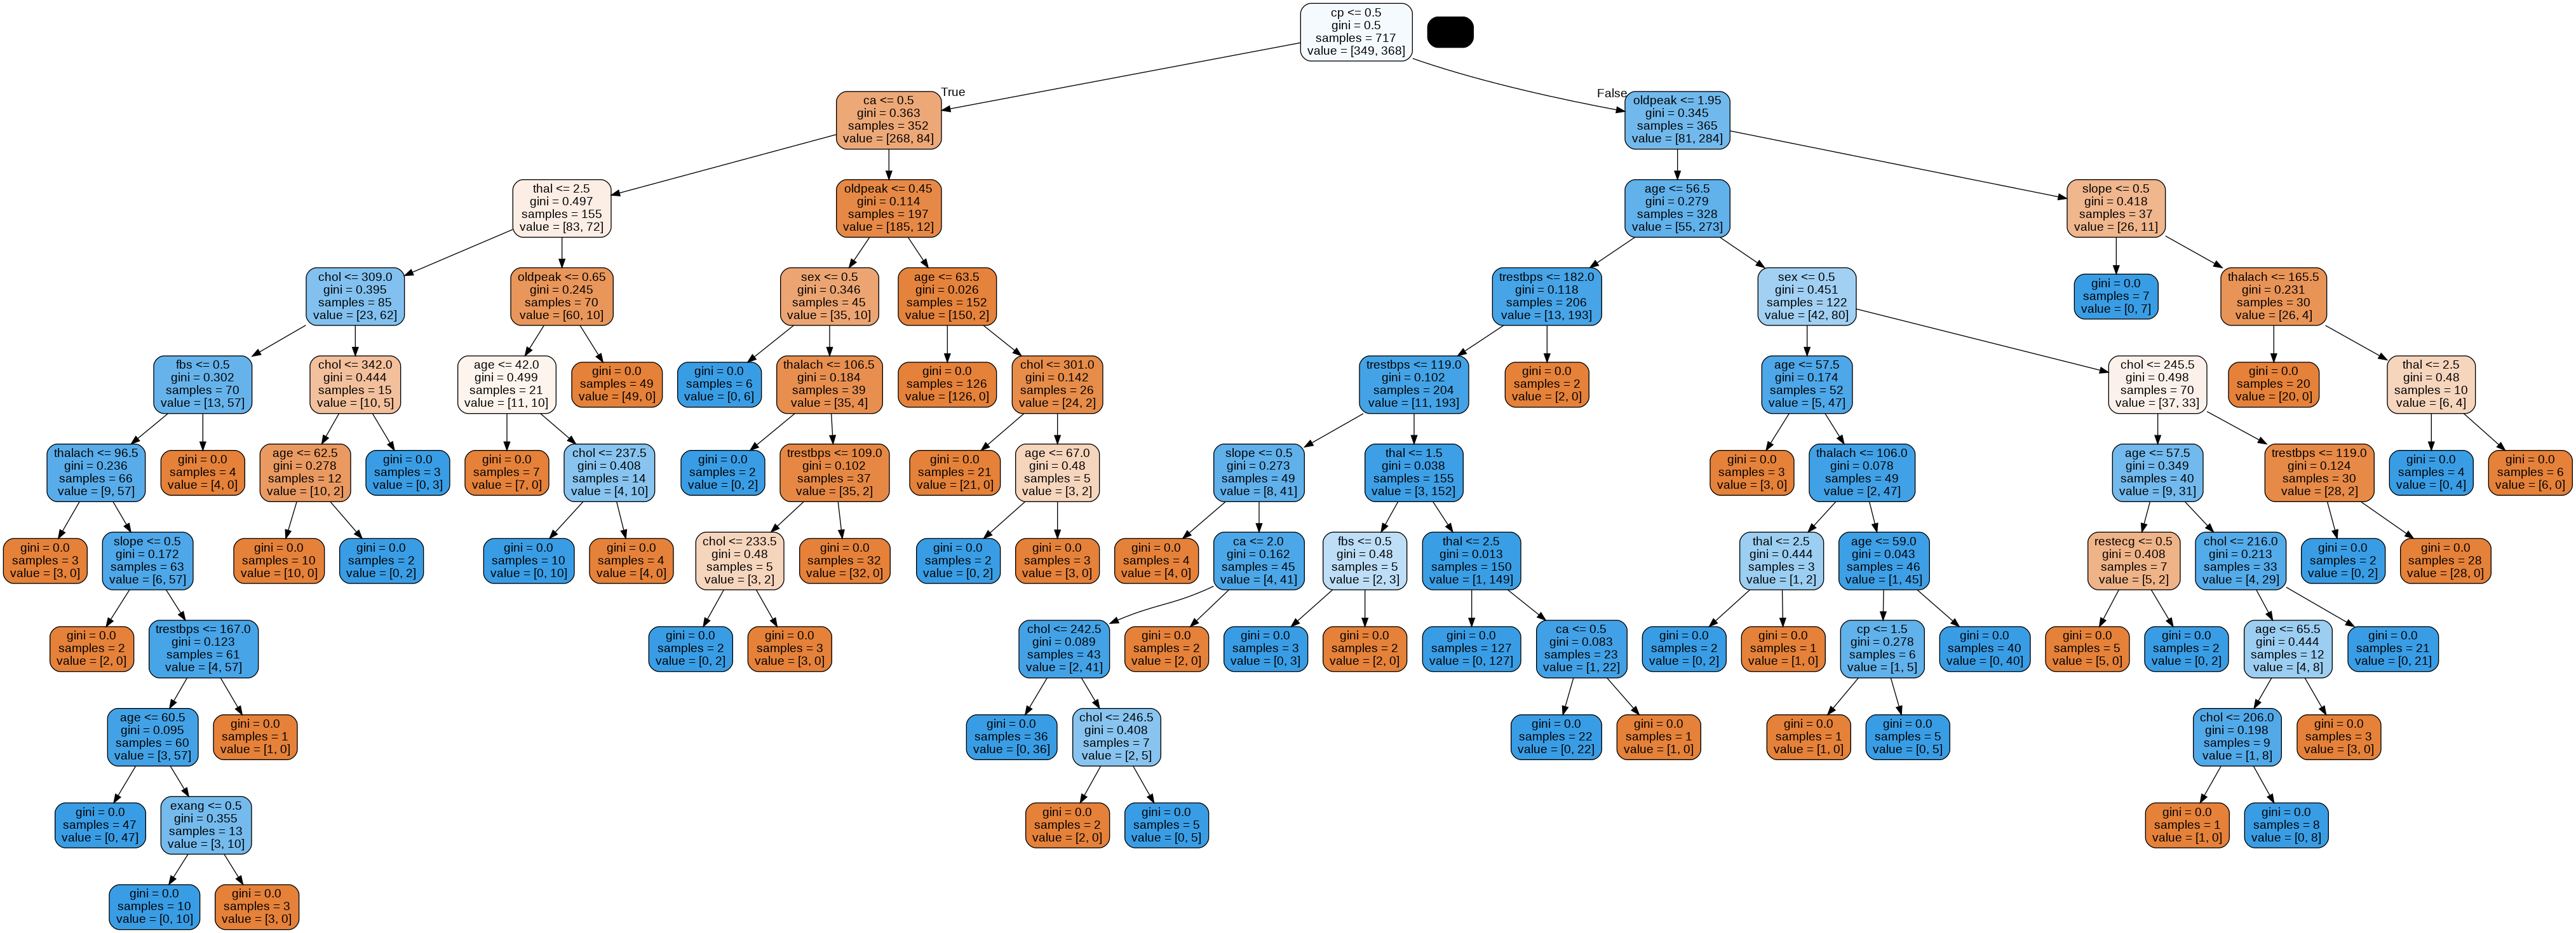

In [18]:
dot_data = StringIO()  
#features = list(df.columns[1:])
export_graphviz(heartTree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

##RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_trainset, y_trainset)

RandomForestClassifier()

In [20]:
rfc_pred = rfc.predict(X_testset)

In [21]:
print(confusion_matrix(y_testset,rfc_pred))

[[150   0]
 [  3 155]]


In [22]:
print(classification_report(y_testset,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



##DecisionTree entropy

In [23]:
from sklearn.tree import DecisionTreeClassifier
HeartTreeEntropy = DecisionTreeClassifier(criterion  = 'entropy')
HeartTreeEntropy

DecisionTreeClassifier(criterion='entropy')

In [24]:
HeartTreeEntropy.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [25]:
predTreeEntropy = HeartTreeEntropy.predict(X_testset)

In [26]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTreeEntropy))

DecisionTrees's Accuracy:  0.9707792207792207


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTreeEntropy))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       150
           1       0.98      0.96      0.97       158

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

